## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [4]:
# load the train and test dataset
train = pd.read_csv("loan_train_data.csv")
test = pd.read_csv("loan_test_data.csv")

In [5]:
# make a copy of original data
train_original = train.copy()
test_original = test.copy()

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
# calculate train-test-split ratio
print("Train Ratio:",train.shape[0]/(train.shape[0]+test.shape[0])) 
print("Test Ratio:",test.shape[0]/(train.shape[0]+test.shape[0]))

Train Ratio: 0.6258919469928644
Test Ratio: 0.37410805300713557


In [9]:
#Check out the features (independent variables) in the dataset.
print("Train Columns:", train.columns)

Train Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [10]:
print("Test Columns:", test.columns)

Test Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


The train set has 13 feature columns and 614 rows, while the test set has 12 feature columns and 367 rows. Combined, there are 981 records, with roughly 63% in the train set and 37% in the test set. The features in the test set are almost the same as in the train set, except for the Loan_Status. We will predict Loan_Status using a model built from the train data.

In [12]:
#Display the data types for each column in the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#Provide a brief summary of the dataset, including information about the index dtype, column data types, non-null values, and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains three data types:
- Object: Represents categorical variables, including Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Loan_Status.
- int64: Represents integer variables, such as ApplicantIncome.
- float64: Represents numerical variables with decimal values, including CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

# Exploratory Data Analysis

### Univariate Analysis
Univariate analysis involves examining each variable separately. For categorical features, we use a frequency table or bar plots to count the occurrences of each category. For numerical features, a histogram or box-plot helps to understand the distribution of the variable. A histogram reveals details about central tendency, variability, modality, and kurtosis, but it doesn't identify outliers. To detect outliers, box-plots are used.

#### Target Variable (Categorical)
We will start by analyzing the target variable, Loan_Status. Since it's categorical, we'll examine its frequency table, percentage distribution, and visualize it using a bar plot.

In [17]:
#A frequency table for a variable shows the count of each category within that variable.
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [18]:
# Percentage distribution can be calculated by setting `normalize=True`, which will display proportions instead of the raw counts.
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

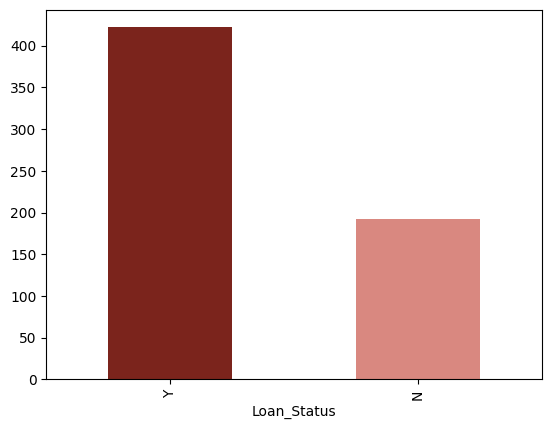

In [19]:
# Bar plot to visualize the frequency of each category
train['Loan_Status'].value_counts().plot.bar(color=['#7b241c', '#d98880'])

Out of 614 people, 422 (around 69%) had their loan approved. Since the classes are not imbalanced, accuracy is a suitable evaluation metric. However, if the classes were imbalanced, precision and recall would be more appropriate metrics.

#### Independent Variables (Categorical)  
The dataset contains 5 categorical or binary features: Gender, Married, Self_Employed, Credit_History, and Education.

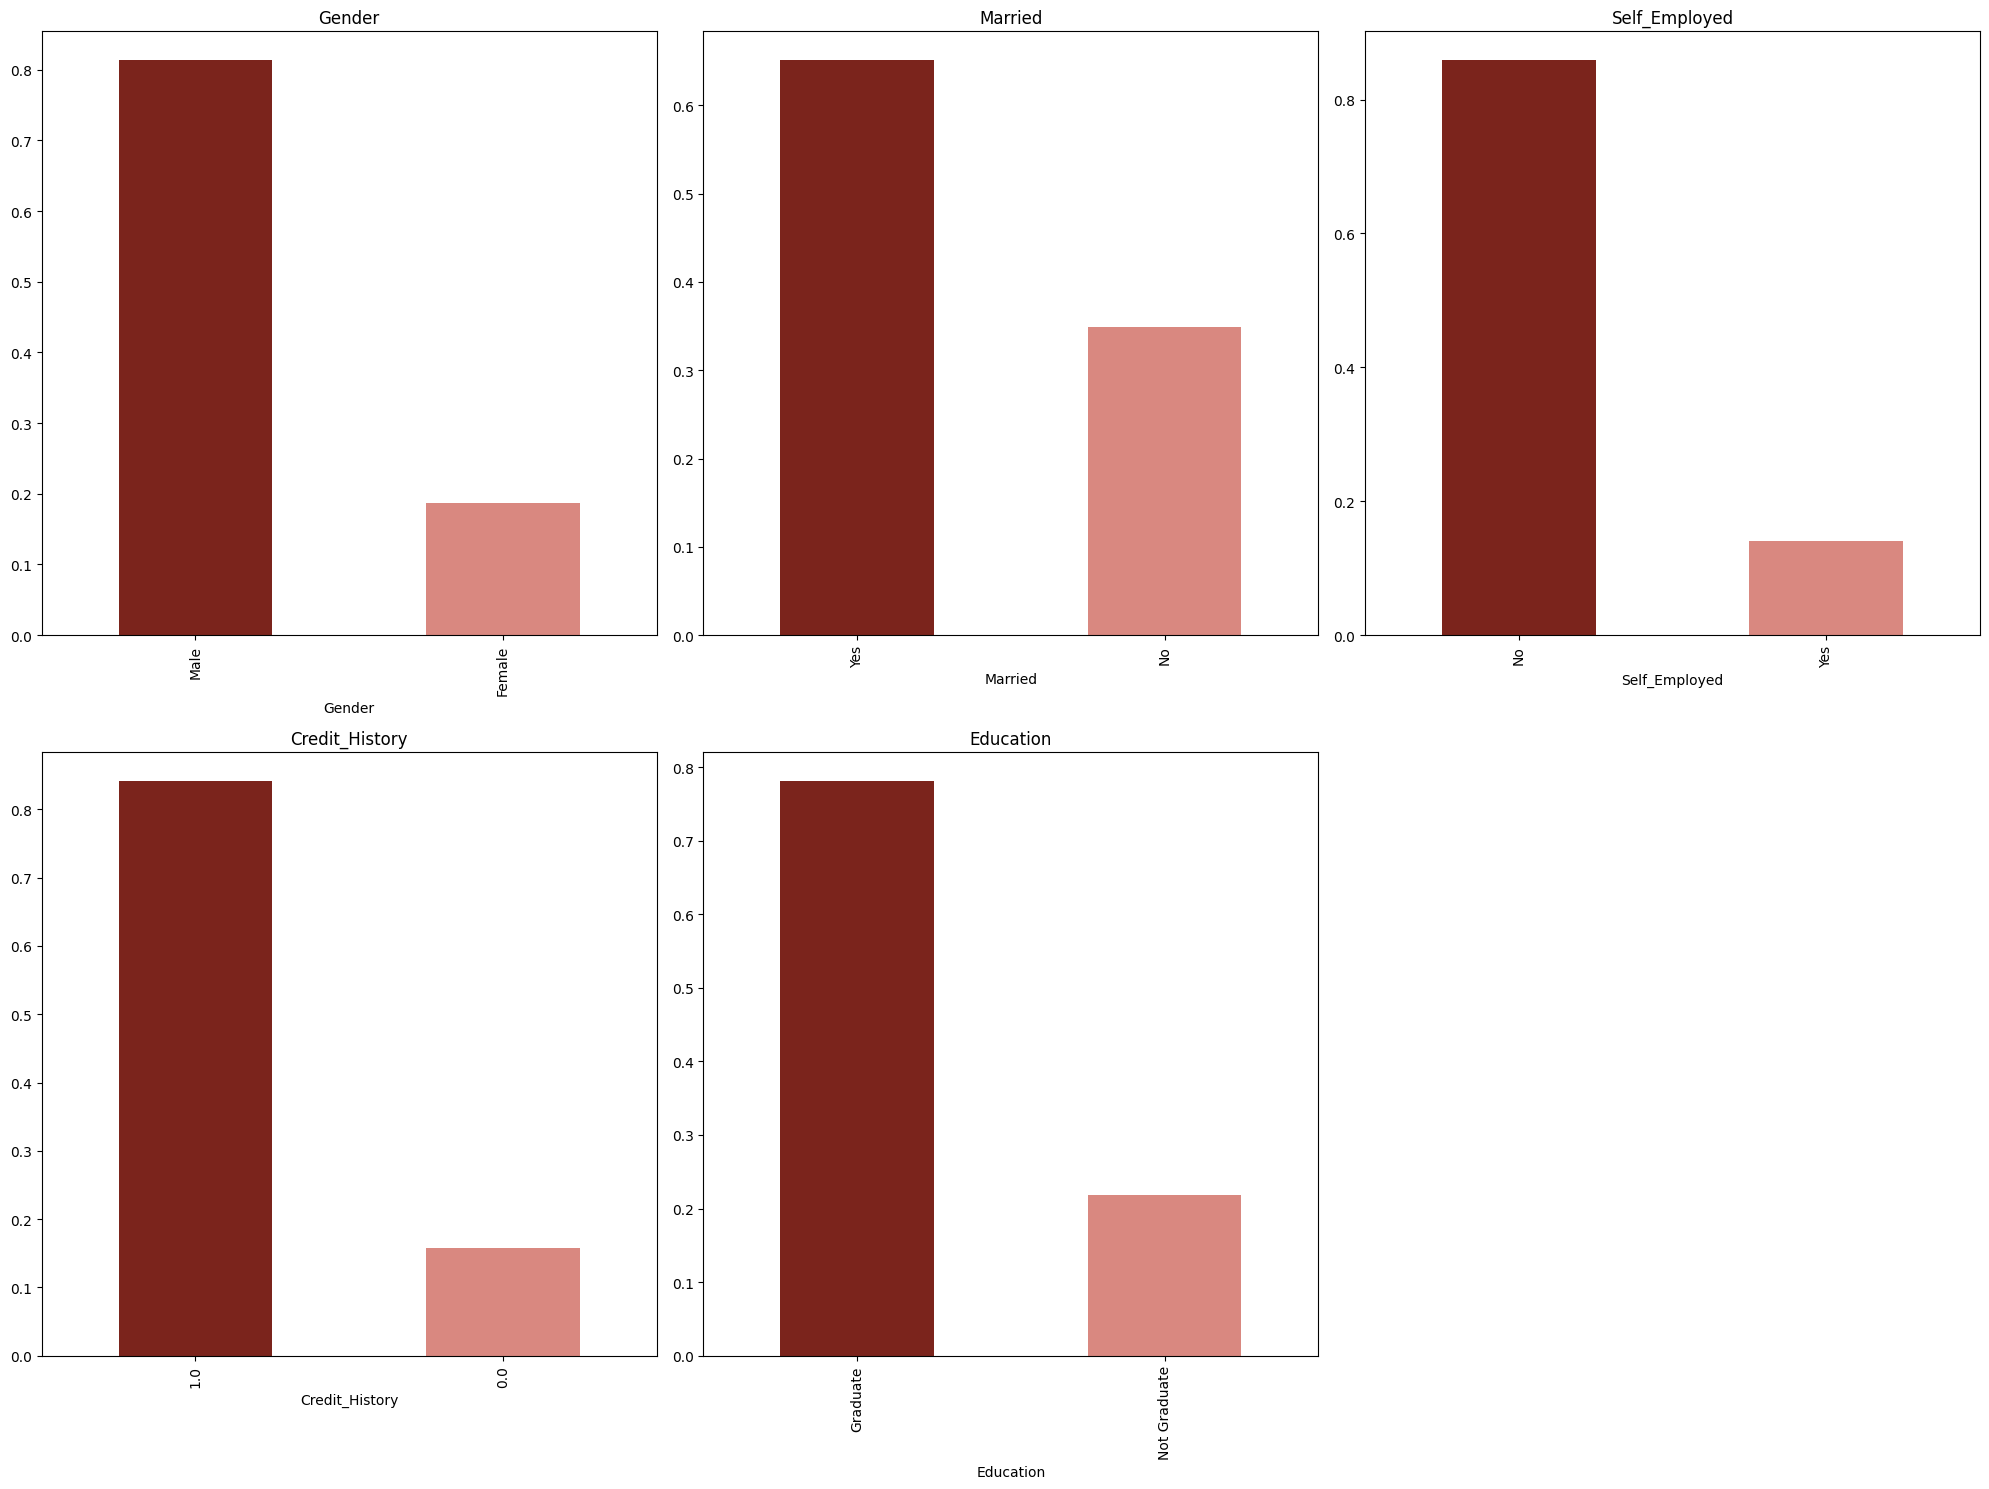

In [22]:
features = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    train[feature].value_counts(normalize=True).plot.bar(title=feature, color=['#7b241c', '#d98880'])

plt.tight_layout()
plt.show()

From the bar plots, we can infer that:

- 80% of the applicants are male.
- Around 65% of the applicants are married.
- Around 15% are self-employed.
- Around 85% have a credit history (repaid debts).
- Around 80% of the applicants are graduates.

#### Independent Variables (Ordinal)  
There are 2 ordinal features, where the categories have a specific order: Dependents and Property_Area.

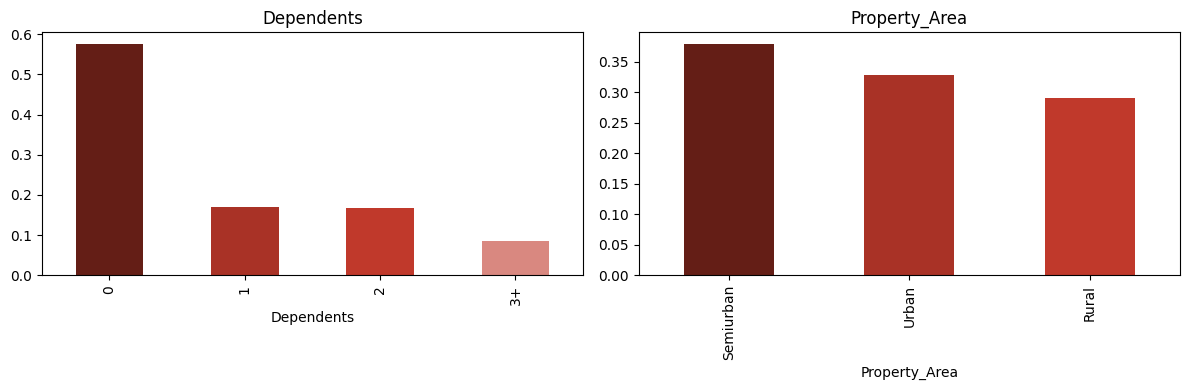

In [25]:
features = ['Dependents', 'Property_Area']

plt.figure(figsize=(12, 4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i) 
    train[feature].value_counts(normalize=True).plot.bar(title=feature, color=['#641e16','#a93226','#c0392b', '#d98880'])

plt.tight_layout()
plt.show()

From the bar plots, the following inferences can be made:

- More than half of the applicants have no dependents.
- Most applicants are from semiurban areas.

#### Independent Variables (Numerical)
There are 4 numerical features with numerical values: ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.

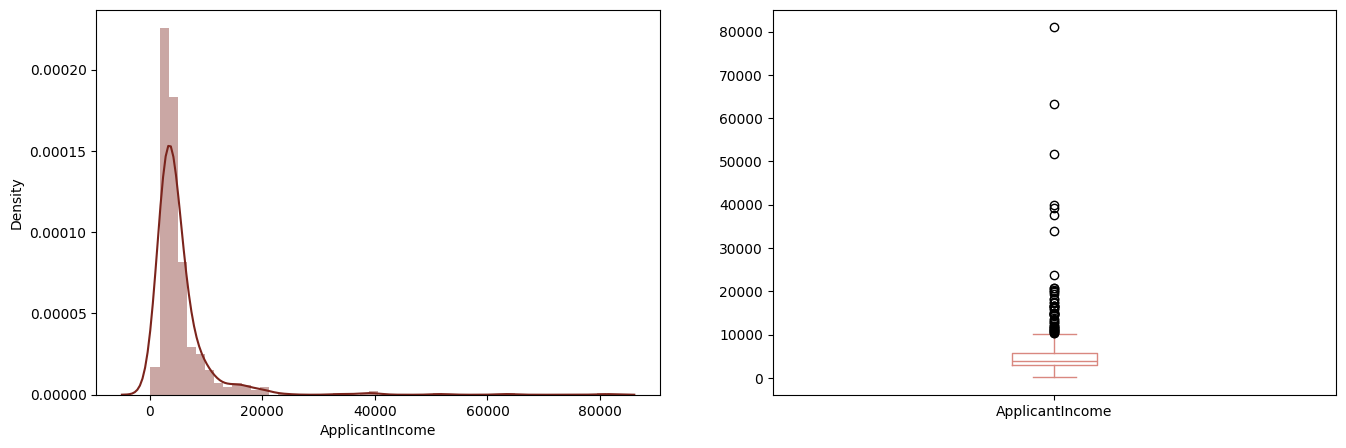

In [28]:
# The distribution of ApplicantIncome.

plt.subplot(121)
sns.distplot(train['ApplicantIncome'], color='#7b241c');  # Added color

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16, 5), color='#d98880');  # Added color

plt.show()

It can be inferred that the distribution of ApplicantIncome is left-heavy, indicating it is not normally distributed and exhibits right skewness (positive skew). We'll attempt to normalize it in later sections, as algorithms perform better with normally distributed data.

The boxplot also reveals many outliers/extreme values, likely due to income disparities in society, influenced by different education levels. Let's break it down by Education.

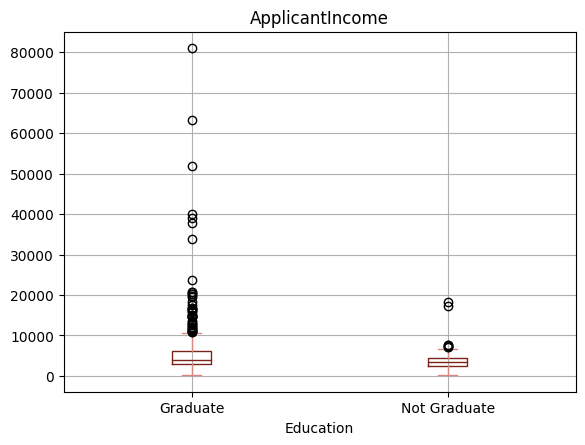

In [30]:
# Boxplot of ApplicantIncome by Education
train.boxplot(column='ApplicantIncome', by='Education', color=dict(boxes='#7b241c', whiskers='#d98880', medians='#7b241c', caps='#d98880'))
plt.suptitle("")  # Removing the default title
plt.show()

It can be observed that a higher number of graduates have very high incomes, which are appearing as outliers in the distribution.

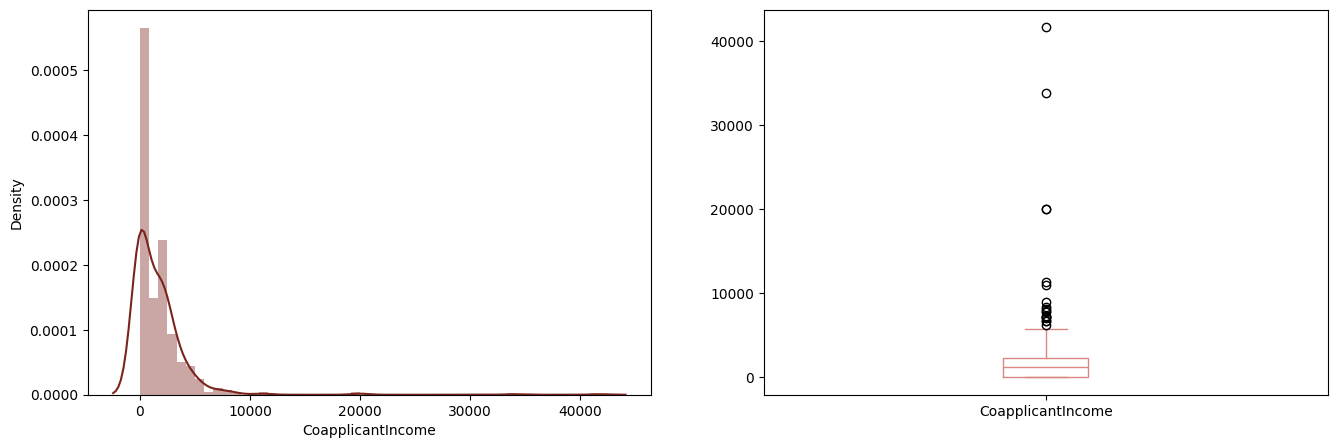

In [32]:
# The distribution of CoapplicantIncome.

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'], color='#7b241c')  # Added color for the distribution plot

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16, 5), color='#d98880')  # Added color for the box plot

plt.show()

The distribution of CoapplicantIncome is similar to ApplicantIncome, with most coapplicants earning between 0 and 5000. There are also many outliers, and the data is not normally distributed.

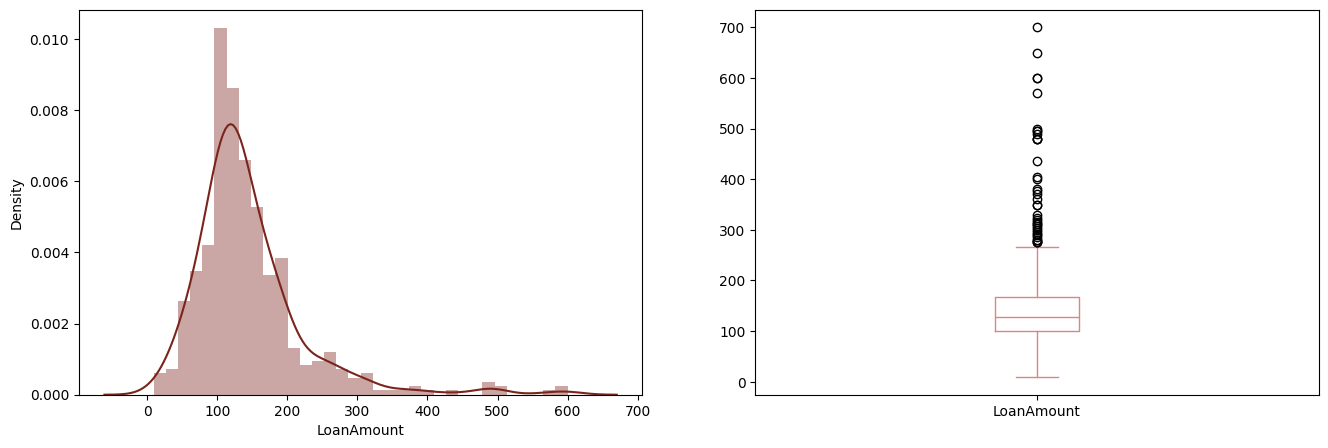

In [34]:
# The distribution of LoanAmount.

plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount'], color='#7b241c')  # Added color for the distribution plot

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16, 5), color='#d98880')  # Added color for the box plot

plt.show()

The distribution of LoanAmount appears fairly normal, though still slightly right-skewed, with many outliers. We will address these outliers in later sections.

In [36]:
# The distribution of the Loan_Amount_Term variable
# frequency table for a variable will show the count of occurrences for each category within that variable.
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

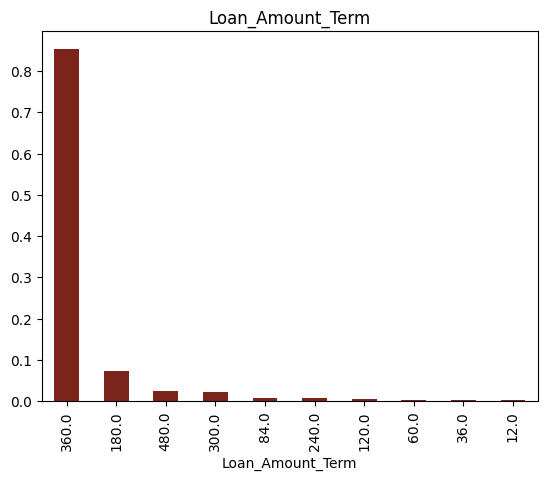

In [37]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term', color=['#7b241c'])

From the bar plot, it can be inferred that:

- Around 85% of the loans have a term of 360 months (30 years).

### Bivariate Analysis
After examining each variable individually in the univariate analysis, we will now explore them in relation to the target variable in the bivariate analysis. This will help us test the hypotheses we generated earlier.

#### Categorical Independent Variable vs Target Variable

First, we will examine the relationship between the target variable and the categorical independent variables. A stacked bar plot will help us visualize the proportion of approved and unapproved loans. For instance, we can explore whether an applicant's gender affects the chances of loan approval.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


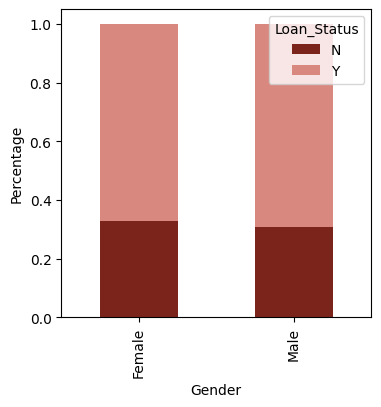

In [41]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


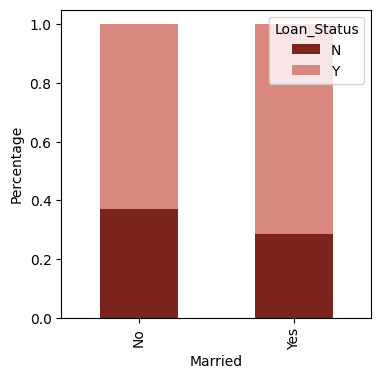

In [42]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", color=['#7b241c', '#d98880'],  stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


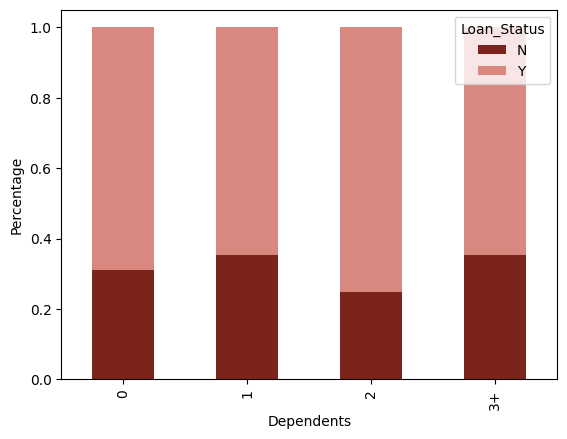

In [43]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", color=['#7b241c', '#d98880'], stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


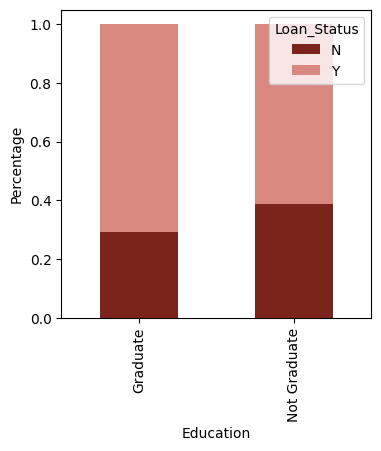

In [44]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", color=['#7b241c', '#d98880'], stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


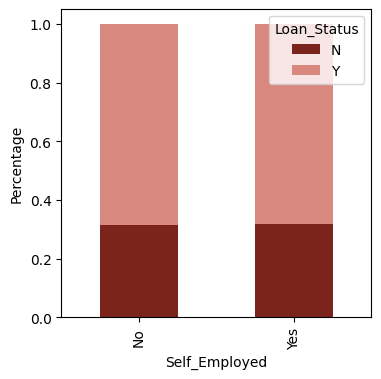

In [45]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


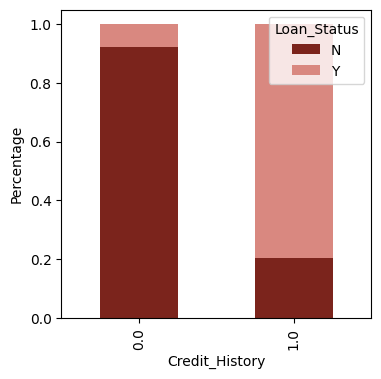

In [46]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", color=['#7b241c', '#d98880'],stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


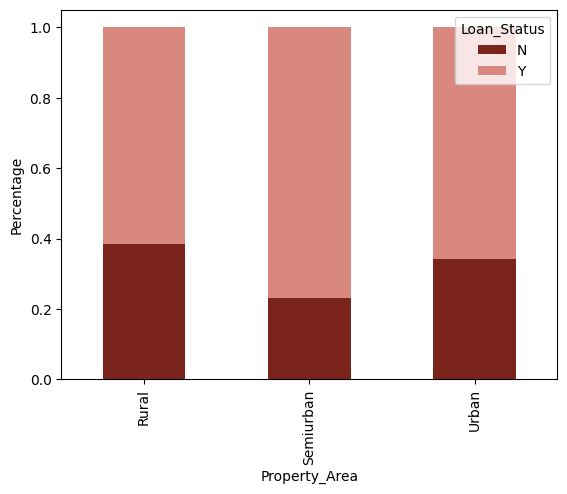

In [47]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'],  stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar charts, we can infer that:

- The proportion of male and female applicants is similar for both approved and unapproved loans.
- Married applicants have a higher proportion of approved loans.
- The distribution of applicants with 1 or 3+ dependents is similar across both Loan_Status categories.
- No significant insight can be drawn from the Self_Employed vs Loan_Status plot.
- Graduates have a higher proportion of loan approvals compared to non-graduates.
- Applicants with a credit history of 1 are more likely to have their loans approved.
- The proportion of loans approved in semiurban areas is higher compared to rural or urban areas.

#### Numerical Independent Variable vs Target Variable

We will compare the mean income of people whose loan was approved with the mean income of those whose loan was not approved.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<Axes: xlabel='Loan_Status'>

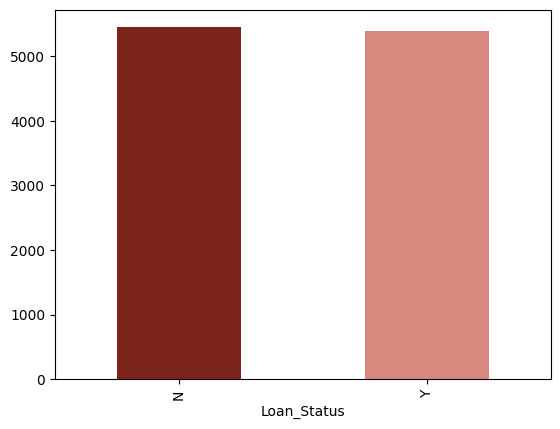

In [50]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['#7b241c', '#d98880'])

Here, the y-axis represents the mean applicant income. There is no significant difference in the mean income between approved and non-approved applicants (5384 vs 5446).

In [52]:
# make bins for the ApplicantIncome variable, we can categorize the income into different ranges (e.g., 'Low','Average','High', 'Very high') to better analyze the distribution.
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [53]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


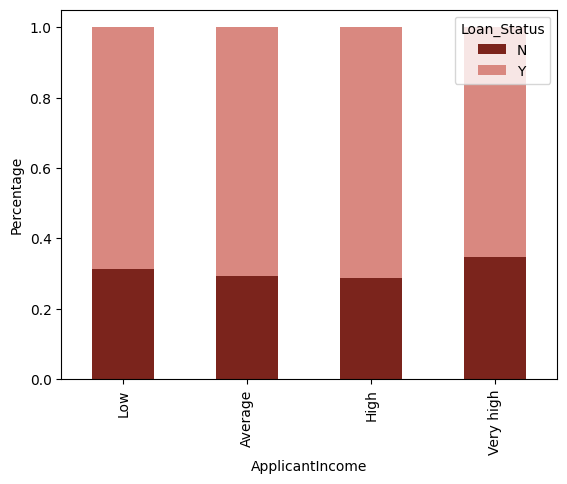

In [54]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that ApplicantIncome does not affect the chances of loan approval, which contradicts our initial hypothesis that higher applicant income would lead to higher chances of loan approval.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [57]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

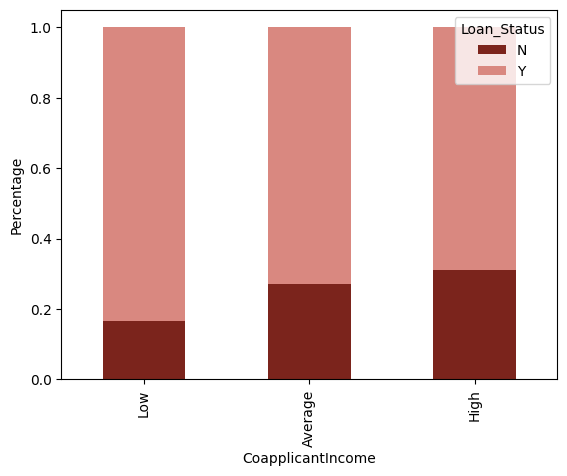

In [58]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [59]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

The analysis shows that if the coapplicant’s income is lower, the chances of loan approval are higher, which seems incorrect. This might be because most applicants do not have a coapplicant, resulting in a coapplicant income of 0, and thus the loan approval is not truly dependent on it. To address this, we can create a new variable by combining the applicant's and coapplicant's income to better visualize the combined effect of income on loan approval.

Let’s combine the Applicant Income and Coapplicant Income to create a new variable for Total Income, and then analyze its combined effect on Loan_Status.

In [62]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [63]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

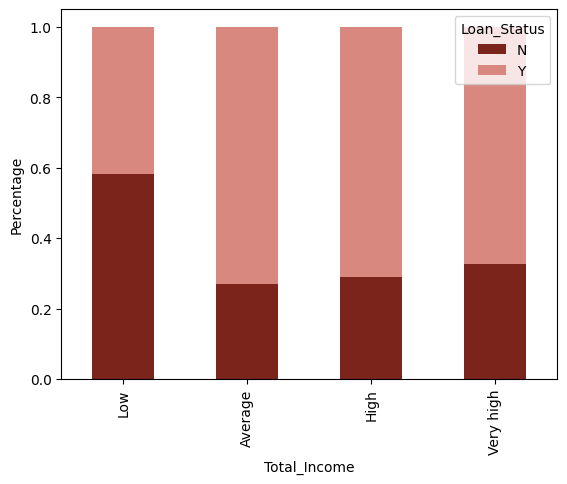

In [64]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can observe that the proportion of loans approved for applicants with low Total_Income is much lower compared to those with Average, High, and Very High incomes. This aligns with our hypothesis that applicants with higher income are more likely to have their loans approved.

Visualize the Loan amount variable.

In [67]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

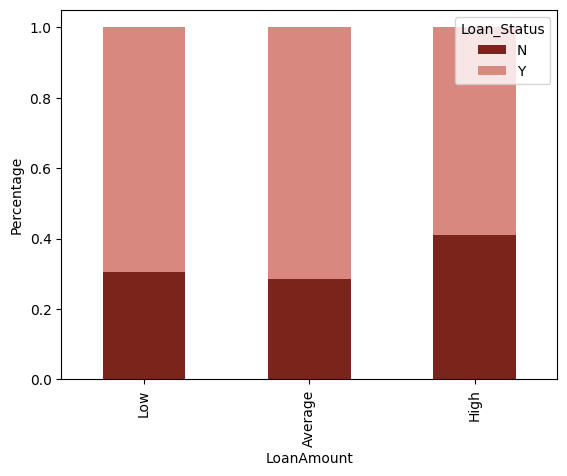

In [68]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",color=['#7b241c', '#d98880'], stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for low and average loan amounts compared to high loan amounts. This supports our hypothesis that the chances of loan approval are higher when the loan amount is lower.

Let's drop the bins we created during the exploration phase.

In [71]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [72]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [73]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will convert the "3+" category in the dependents variable to 3, making it numerical. Additionally, we will transform the target variable’s categories into 0 and 1 to analyze its correlation with numerical variables. This change is also necessary because some models, like logistic regression, accept only numeric values as input. We will replace "N" with 0 and "Y" with 1.

In [75]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [76]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [77]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now, let's examine the correlation between all the numerical variables. We can use the corr() function to compute the pairwise correlation of columns, excluding NA/null values, using the Pearson correlation coefficient. Next, we'll use a heatmap to visualize the correlation. Heatmaps represent data through color variations, with darker colors indicating stronger correlations.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


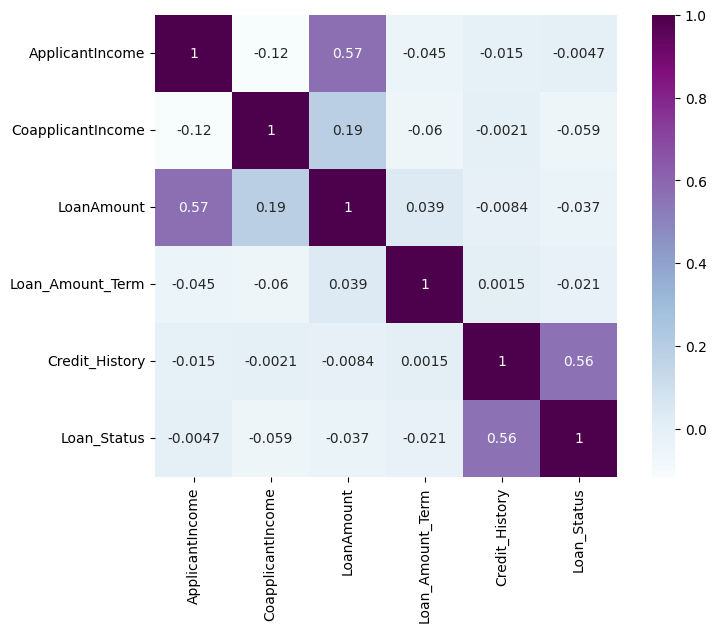

In [79]:
# Calculate and visualize correlation matrix
numeric_cols = train.select_dtypes(include=['number']).columns 
matrix = train[numeric_cols].corr()  

# Visualize the correlation matrix
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix


We observe that the most correlated variables are:

- (ApplicantIncome - LoanAmount) with a correlation coefficient of 0.57
- (Credit_History - Loan_Status) with a correlation coefficient of 0.56
- LoanAmount is also correlated with CoapplicantIncome, with a correlation coefficient of 0.19.